In [3]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


df = pd.read_csv('E:\\credit\\credittrain.csv')
df2 = df.dropna()



In [4]:
X = df2.iloc[:,[6,8]]
print(X.head())

'''
Y = df2.iloc[:,-2]  # property # convert to Numerics
print(Y.head())
'''

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df2["Property_Area_code"] = lb_make.fit_transform(df2["Property_Area"])
df2[["Property_Area", "Property_Area_code"]].head(11)

Y = df2["Property_Area_code"]  # property # convert to Numerics
print(Y.head())



   ApplicantIncome  LoanAmount
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0
5             5417       267.0
1    0
2    2
3    2
4    2
5    2
Name: Property_Area_code, dtype: int32


C:\Users\rs\Anaconda5\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
df2 = pd.get_dummies(df2.drop(['Loan_ID'],axis=1) ,drop_first=True)
df2.head()


ktype = 'linear'  # linear, poly,sigmoid , rbf

from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel=ktype, C=1,gamma=1).fit(X, Y)


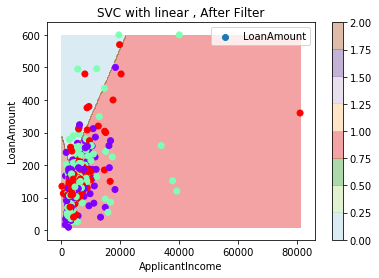

In [6]:
########################################
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
#print(x_min, x_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)
#########################################

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  alpha=0.4, cmap=plt.cm.Paired) 

plt.colorbar() 



plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
#plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.legend()
plt.show()